### Finding Optimal point with Gradient Descent

/Users/user1/Desktop/MSc. Machine Learning, Systems and Control/Giacomo/ultimate_venv/lib/python3.10/site-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
/Users/user1/Desktop/MSc. Machine Learning, Systems and Control/Giacomo/ultimate_venv/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


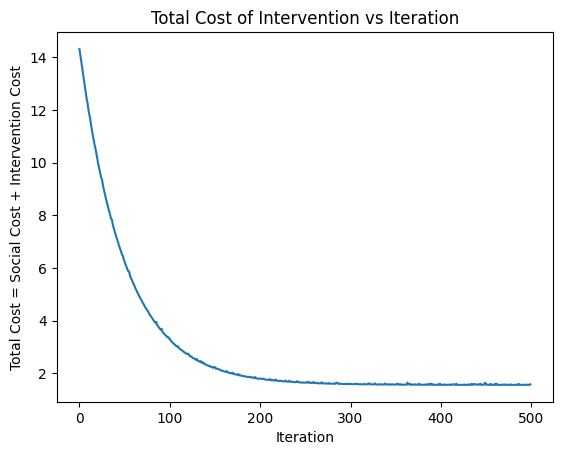

In [40]:
import numpy as np
from scipy.optimize import minimize

# Inputs
m=1
a = [2,4,1,0.5,3]
mu = 0.01
alpha = 0.5
u = np.array([1,0.5,5,0,0])

# functions
he = lambda u: u**2 # cost of intervention
dhe = lambda u: 2*u # derivative of he

Ce = lambda f, tau: f*tau # total delay in a link
dCe = lambda f, u, a: -a*(f**2)/(1+u) # derivative of C w.r.t ue

tau = lambda a, f, u: a*f/(1+u) # delay function


def integral_tau(f):
    s = 0
    for i in range(5):
        s += 0.5*a[i]*(f[i]**2)/(1+u[i])
    return s

def conservation_of_mass(f):
    return np.dot(B, f) - v
constraint = ({'type': 'eq', 'fun': lambda f: conservation_of_mass(f)})

v = m*(np.array([1,0,0,0]) - np.array([0,0,0,1]))
B = np.array([[1,1,0,0,0],[-1,0,1,1,0],[0,-1,-1,0,1],[0,0,0,-1,-1]])

T = []

for _ in range(500):
    # Calculate Wardrop equilibrium for u
    result = minimize(integral_tau, x0=[1,0,0,1,0], constraints=constraint, method='trust-constr', bounds=[(0,None) for i in range(5)])
    f_eq = result.x
    
    # Update u given f_eq
    dh = np.array([dhe(u[i]) for i in range(5)])
    dC = np.array([dCe(f_eq[i],u[i],a[i]) for i in range(5)])
    dT = dC + alpha*dh
    du = -mu*dT
    T.append(np.sum([f_eq[i]*tau(a[i], f_eq[i], u[i]) + alpha*he(u[i]) for i in range(5)]))
    u = u + du

import matplotlib.pyplot as plt

plt.title('Total Cost of Intervention vs Iteration')
plt.ylabel('Total Cost = Social Cost + Intervention Cost')
plt.xlabel('Iteration')
plt.plot(T)

In [41]:
u

array([0.74381586, 0.13589224, 0.03347204, 0.24919279, 0.11835619])

In [42]:
print(f'Total cost from {round(T[0],2)} to {round(T[-1],2)}')

Total cost from 14.31 to 1.58


### Finding Optimal point with Gradient Descent (Another Initial Guesses)

Initial u: [7.47479505 8.93034673 2.48033069 7.75843897 3.91409735]
Final u: [0.74064574 0.18656314 0.01684069 0.27173562 0.14353341]
Total cost from 108.87 to 1.57


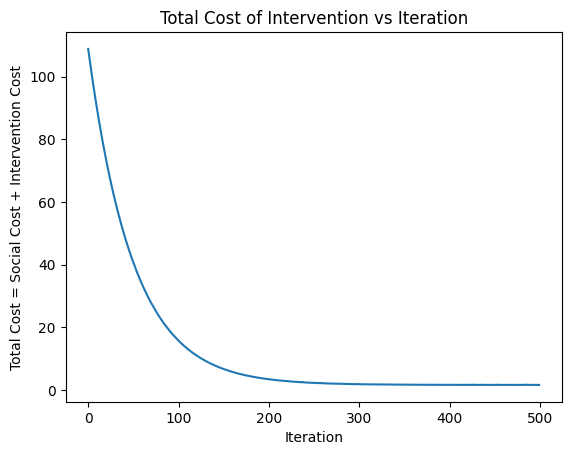


Initial u: [ 4.34116881  3.66134851  1.46351594 -0.57406112  1.27172022]
Final u: [0.74110737 0.15672917 0.01030162 0.24464462 0.13018484]
Total cost from 19.06 to 1.56


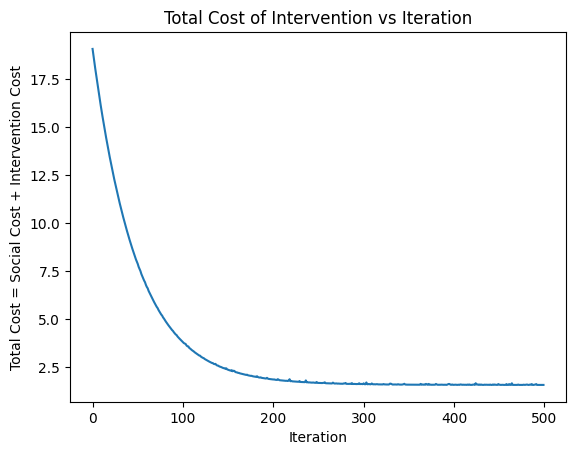


Initial u: [2.8569572  6.94722703 9.53491381 9.17913446 5.901485  ]
Final u: [0.72660964 0.18478072 0.06311175 0.27476014 0.15945336]
Total cost from 133.59 to 1.56


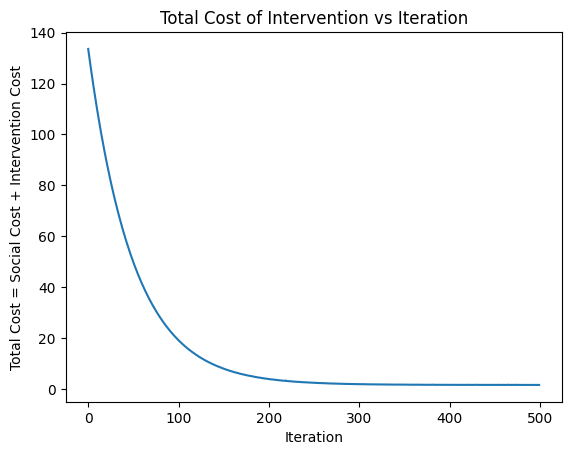


Initial u: [4.83489352 3.63171548 2.72652125 0.12430213 9.13704851]
Final u: [0.72779726 0.17207822 0.01869682 0.23933264 0.17919364]
Total cost from 64.19 to 1.56


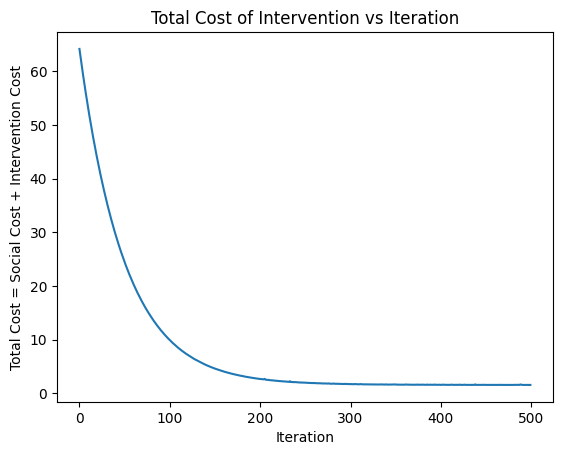


Initial u: [ 0.33382208  5.08927201  5.73283765  3.10090225 -0.81630218]
Final u: [0.73527515 0.16383525 0.03805562 0.25713127 0.11796464]
Total cost from 36.06 to 1.56


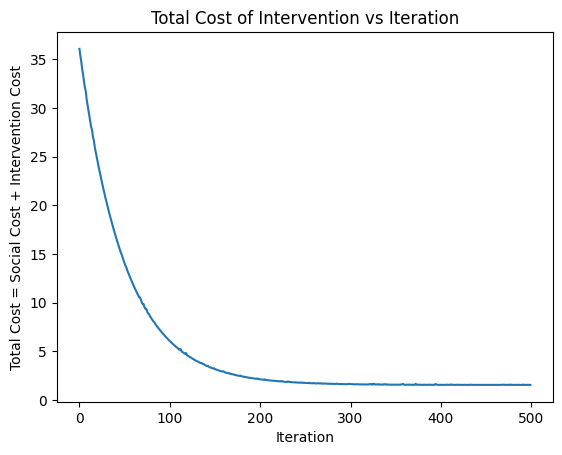


Initial u: [-0.54198901  1.1613036   0.57158279  1.34189434  1.86403701]
Final u: [0.73227473 0.15112322 0.0042904  0.24951899 0.13319462]
Total cost from 5.4 to 1.56


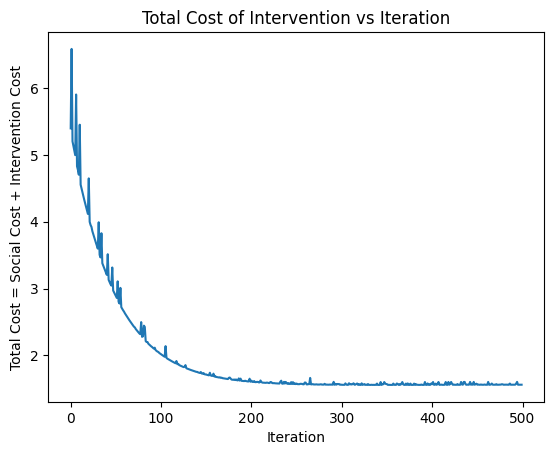


Initial u: [ 5.62613388 -0.81783778  6.55839627  7.279573    2.9890591 ]
Final u: [0.75681722 0.12031722 0.04349165 0.27896135 0.12023156]
Total cost from 68.98 to 1.61


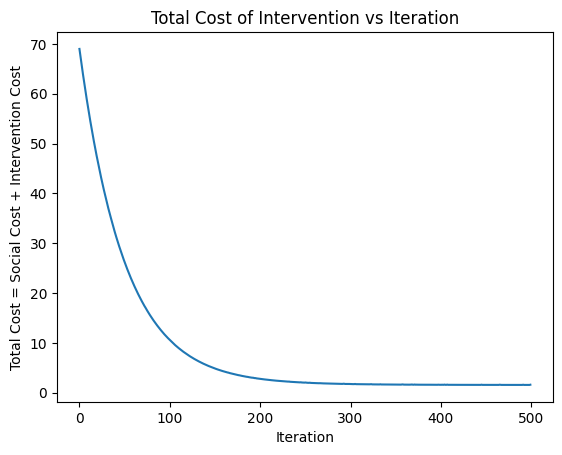


Initial u: [ 7.11104011  2.05012611  4.49833228 -0.68202122 -0.75299199]
Final u: [0.75569032 0.13699534 0.02998521 0.25249728 0.10620167]
Total cost from 39.67 to 1.57


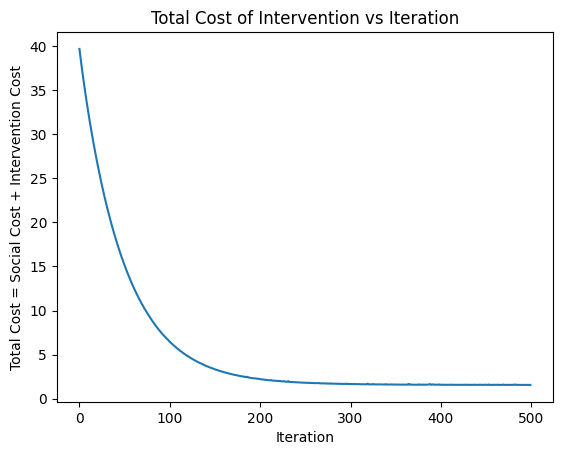


Initial u: [8.53880515 4.98318529 9.15403147 9.84937093 7.80150896]
Final u: [0.74726735 0.16275045 0.06069159 0.28125518 0.16038155]
Total cost from 169.91 to 1.57


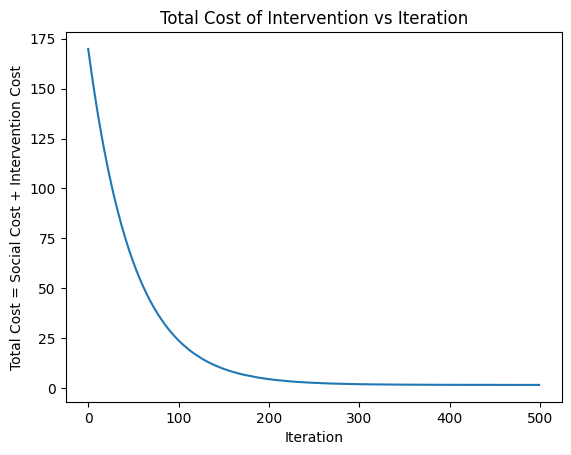


Initial u: [3.9812092  2.88865552 0.13030079 9.73824307 1.31578173]
Final u: [0.74938217 0.1435571  0.00145004 0.28497235 0.12009455]
Total cost from 60.76 to 1.57


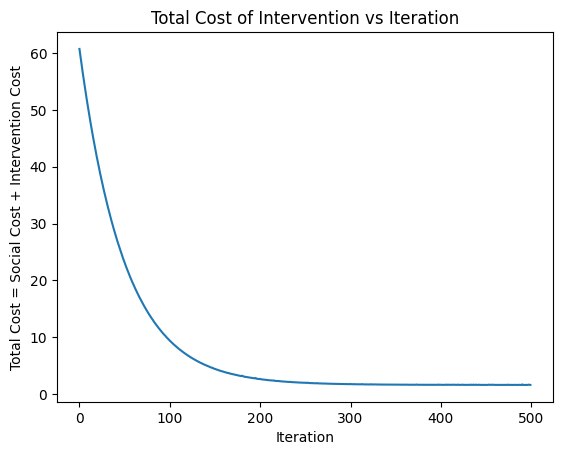

In [66]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Inputs
m=1
a = [2,4,1,0.5,3]
mu = 0.01
alpha = 0.5
u = np.array([2,0.5,10,9,-0.8])

# functions
he = lambda u: u**2 # cost of intervention
dhe = lambda u: 2*u # derivative of he

Ce = lambda f, tau: f*tau # total delay in a link
dCe = lambda f, u, a: -a*(f**2)/(1+u) # derivative of C w.r.t ue

tau = lambda a, f, u: a*f/(1+u) # delay function


def integral_tau(f):
    s = 0
    for i in range(5):
        s += 0.5*a[i]*(f[i]**2)/(1+u[i])
    return s

def conservation_of_mass(f):
    return np.dot(B, f) - v
constraint = ({'type': 'eq', 'fun': lambda f: conservation_of_mass(f)})

v = m*(np.array([1,0,0,0]) - np.array([0,0,0,1]))
B = np.array([[1,1,0,0,0],[-1,0,1,1,0],[0,-1,-1,0,1],[0,0,0,-1,-1]])

for _ in range(10): 
    u = np.random.uniform(-1,10,5)
    T = []
    print(f'Initial u: {u}')
    for _ in range(500):
        # Calculate Wardrop equilibrium for u
        result = minimize(integral_tau, x0=[1,0,0,1,0], constraints=constraint, method='trust-constr', bounds=[(0,None) for i in range(5)])
        f_eq = result.x

        # Update u given f_eq
        dh = np.array([dhe(u[i]) for i in range(5)])
        dC = np.array([dCe(f_eq[i],u[i],a[i]) for i in range(5)])
        dT = dC + alpha*dh
        du = -mu*dT
        T.append(np.sum([f_eq[i]*tau(a[i], f_eq[i], u[i]) + alpha*he(u[i]) for i in range(5)]))
        u = u + du

    print(f'Final u: {u}')
    print(f'Total cost from {round(T[0],2)} to {round(T[-1],2)}')
    plt.title('Total Cost of Intervention vs Iteration')
    plt.ylabel('Total Cost = Social Cost + Intervention Cost')
    plt.xlabel('Iteration')
    plt.plot(T)
    plt.show()
    print()
    (0.625, 0.25, -0.125, 0.25, 0.25)

### Naive Grid Search -> Checking if Convex

In [63]:
import numpy as np
from scipy.optimize import minimize

# Inputs
m=1
a = [2,4,1,0.5,3]
mu = 0.01
alpha = 0.5

# functions
he = lambda u: u**2 # cost of intervention
dhe = lambda u: 2*u # derivative of he

Ce = lambda f, tau: f*tau # total delay in a link
dCe = lambda f, u, a: -a*(f**2)/(1+u) # derivative of C w.r.t ue

tau = lambda a, f, u: a*f/(1+u) # delay function


def integral_tau(f):
    s = 0
    for i in range(5):
        s += a[i]*(f[i]**2)/(1+u[i])
    return s

def conservation_of_mass(f):
    return np.dot(B, f) - v
constraint = ({'type': 'eq', 'fun': lambda f: conservation_of_mass(f)})

v = m*(np.array([1,0,0,0]) - np.array([0,0,0,1]))
B = np.array([[1,1,0,0,0],[-1,0,1,1,0],[0,-1,-1,0,1],[0,0,0,-1,-1]])

T = []

u_min = -1
u_max = 10

n_iter = 1000

res = {'u':[],
       'T':[]}

for k in range(n_iter):
    # Get random u
    u = np.random.uniform(u_min, u_max, 5)
    
    # Calculate Wardrop equilibrium for u
    result = minimize(integral_tau, x0=[1,0,0,1,0], constraints=constraint, method='trust-constr', bounds=[(0,None) for i in range(5)])
    f_eq = result.x
    
    # Calculating T
    T = np.sum([f_eq[i]*tau(a[i], f_eq[i], u[i]) + alpha*he(u[i]) for i in range(5)])
    
    # Saving values
    res['u'].append(u)
    res['T'].append(T)
    
    if k%100 == 0:
        print(f'[{k}/{n_iter}]')
    
import pandas as pd

data = pd.DataFrame(res)
data['u'] = data.u.apply(lambda x: [round(x[i],2) for i in range(5)])

print(data.sort_values('T', ascending=True).head(10))

print('done!')

[0/1000]
[100/1000]
[200/1000]
[300/1000]
[400/1000]
[500/1000]
[600/1000]
[700/1000]
[800/1000]
[900/1000]
                                     u          T
622      [2.84, 0.04, 1.17, 0.13, 0.0]   5.578018
201     [0.62, 2.81, -0.8, 0.05, 0.07]   5.638172
452    [2.61, 1.55, 0.32, -0.16, 1.43]   6.516235
442    [-0.2, -0.96, 0.95, 2.91, 0.03]   7.724047
983    [3.9, 0.26, -0.59, -0.35, 0.38]   8.877057
697     [0.33, 0.21, 2.65, 1.07, 2.78]   9.268727
494  [1.07, -0.85, -0.13, -0.13, 3.82]   9.755601
805     [0.15, 1.78, 0.41, 3.76, 0.34]  10.054236
848     [2.68, 3.33, 0.04, 1.01, 0.82]  10.587468
853      [3.7, -0.33, 2.08, 1.5, 0.89]  11.180471
done!


In [64]:
import numpy as np
from scipy.optimize import minimize

# Inputs
m=1
a = [2,4,1,0.5,3]
mu = 0.01
alpha = 0.5

# functions
he = lambda u: u**2 # cost of intervention
dhe = lambda u: 2*u # derivative of he

Ce = lambda f, tau: f*tau # total delay in a link
dCe = lambda f, u, a: -a*(f**2)/(1+u) # derivative of C w.r.t ue

tau = lambda a, f, u: a*f/(1+u) # delay function


def integral_tau(f):
    s = 0
    for i in range(5):
        s += a[i]*(f[i]**2)/(1+u[i])
    return s

def conservation_of_mass(f):
    return np.dot(B, f) - v
constraint = ({'type': 'eq', 'fun': lambda f: conservation_of_mass(f)})

v = m*(np.array([1,0,0,0]) - np.array([0,0,0,1]))
B = np.array([[1,1,0,0,0],[-1,0,1,1,0],[0,-1,-1,0,1],[0,0,0,-1,-1]])

T = []

u_min = -0.5
u_max = 2

n_iter = 1000

res = {'u':[],
       'T':[]}

for k in range(n_iter):
    # Get random u
    u = np.random.uniform(u_min, u_max, 5)
    
    # Calculate Wardrop equilibrium for u
    result = minimize(integral_tau, x0=[1,0,0,1,0], constraints=constraint, method='trust-constr', bounds=[(0,None) for i in range(5)])
    f_eq = result.x
    
    # Calculating T
    T = np.sum([f_eq[i]*tau(a[i], f_eq[i], u[i]) + alpha*he(u[i]) for i in range(5)])
    
    # Saving values
    res['u'].append(u)
    res['T'].append(T)
    
    if k%100 == 0:
        print(f'[{k}/{n_iter}]')
    
import pandas as pd

data = pd.DataFrame(res)
data['u'] = data.u.apply(lambda x: [round(x[i],2) for i in range(5)])

print(data.sort_values('T', ascending=True).head(10))

print('done!')

/Users/user1/Desktop/MSc. Machine Learning, Systems and Control/Giacomo/ultimate_venv/lib/python3.10/site-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
/Users/user1/Desktop/MSc. Machine Learning, Systems and Control/Giacomo/ultimate_venv/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


[0/1000]
[100/1000]
[200/1000]
[300/1000]
[400/1000]
[500/1000]
[600/1000]
[700/1000]
[800/1000]
[900/1000]
                                    u         T
174   [0.47, 0.3, -0.11, -0.14, 0.24]  1.633039
71      [0.7, 0.2, -0.4, 0.14, -0.14]  1.670322
609      [0.26, 0.07, -0.5, 0.1, 0.3]  1.736297
608   [0.21, 0.22, -0.26, 0.42, -0.2]  1.745995
793  [0.31, -0.07, -0.26, 0.41, -0.3]  1.757212
667   [0.85, 0.03, -0.21, 0.03, 0.02]  1.760551
716  [0.69, -0.12, 0.26, 0.69, -0.13]  1.773153
563   [0.51, 0.34, -0.34, 0.49, 0.58]  1.776353
517   [0.57, -0.31, 0.12, 0.63, 0.26]  1.777078
838    [0.7, 0.62, -0.41, 0.31, 0.38]  1.810258
done!


size: 3125
[0/3125]
[500/3125]
[1000/3125]
[1500/3125]
[2000/3125]
[2500/3125]
[3000/3125]
done!


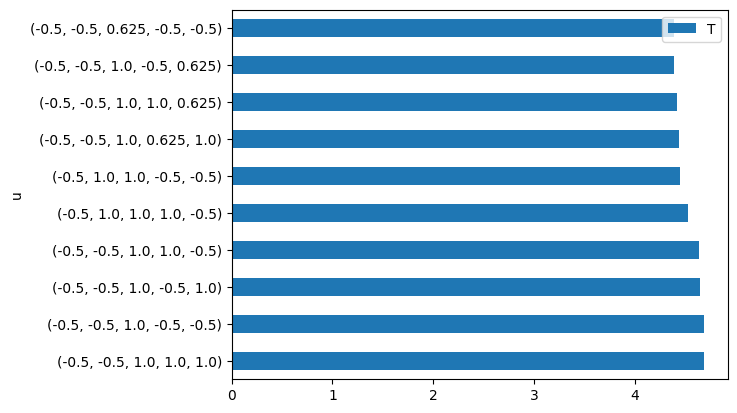

In [68]:
import numpy as np
from scipy.optimize import minimize

# Inputs
m=1
a = [2,4,1,0.5,3]
mu = 0.01
alpha = 0.5

# functions
he = lambda u: u**2 # cost of intervention
dhe = lambda u: 2*u # derivative of he

Ce = lambda f, tau: f*tau # total delay in a link
dCe = lambda f, u, a: -a*(f**2)/(1+u) # derivative of C w.r.t ue

tau = lambda a, f, u: a*f/(1+u) # delay function


def integral_tau(f):
    s = 0
    for i in range(5):
        s += a[i]*(f[i]**2)/(1+u[i])
    return s

def conservation_of_mass(f):
    return np.dot(B, f) - v
constraint = ({'type': 'eq', 'fun': lambda f: conservation_of_mass(f)})

v = m*(np.array([1,0,0,0]) - np.array([0,0,0,1]))
B = np.array([[1,1,0,0,0],[-1,0,1,1,0],[0,-1,-1,0,1],[0,0,0,-1,-1]])

T = []

u_min = -0.5
u_max = 1

possible_us = np.linspace(u_min, u_max, 5)

combs = list(itertools.product(possible_us, repeat=5))
print(f'size: {len(combs)}')

res = {'u':[],
       'T':[]}

for k, comb in enumerate(combs):
    # Get random u
    u = comb
    
    # Calculate Wardrop equilibrium for u
    result = minimize(integral_tau, x0=[1,0,0,1,0], constraints=constraint, method='trust-constr', bounds=[(0,None) for i in range(5)])
    f_eq = result.x
    
    # Calculating T
    T = np.sum([f_eq[i]*tau(a[i], f_eq[i], u[i]) + alpha*he(u[i]) for i in range(5)])
    
    # Saving values
    res['u'].append(u)
    res['T'].append(T)
    
    if k%500 == 0:
        print(f'[{k}/{len(combs)}]')
    
import pandas as pd

pd.DataFrame(res).sort_values('T', ascending=False).head(10).plot(x='u', y='T', kind='barh')

print('done!')

In [71]:
pd.DataFrame(res).sort_values('T', ascending=True).head(10)

,u,T
2162,"(0.625, 0.25, -0.125, 0.25, 0.25)",1.560716
2161,"(0.625, 0.25, -0.125, 0.25, -0.125)",1.582269
2187,"(0.625, 0.25, 0.25, 0.25, 0.25)",1.583331
2037,"(0.625, -0.125, -0.125, 0.25, 0.25)",1.595062
2036,"(0.625, -0.125, -0.125, 0.25, -0.125)",1.604650
1537,"(0.25, 0.25, -0.125, 0.25, 0.25)",1.606635
2062,"(0.625, -0.125, 0.25, 0.25, 0.25)",1.618505
2061,"(0.625, -0.125, 0.25, 0.25, -0.125)",1.628083
1562,"(0.25, 0.25, 0.25, 0.25, 0.25)",1.629966
2186,"(0.625, 0.25, 0.25, 0.25, -0.125)",1.640753


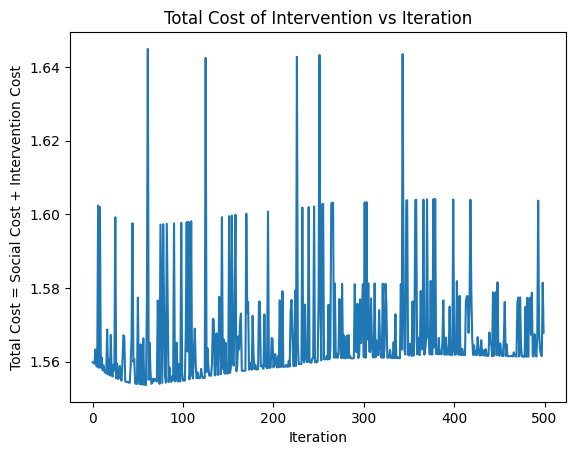

In [77]:
import numpy as np
from scipy.optimize import minimize

# Inputs
m=1
a = [2,4,1,0.5,3]
mu = 0.01
alpha = 0.5
u = np.array([0.625, 0.25, -0.125, 0.25, 0.25])

# functions
he = lambda u: u**2 # cost of intervention
dhe = lambda u: 2*u # derivative of he

Ce = lambda f, tau: f*tau # total delay in a link
dCe = lambda f, u, a: -a*(f**2)/(1+u) # derivative of C w.r.t ue

tau = lambda a, f, u: a*f/(1+u) # delay function


def integral_tau(f):
    s = 0
    for i in range(5):
        s += 0.5*a[i]*(f[i]**2)/(1+u[i])
    return s

def conservation_of_mass(f):
    return np.dot(B, f) - v
constraint = ({'type': 'eq', 'fun': lambda f: conservation_of_mass(f)})

v = m*(np.array([1,0,0,0]) - np.array([0,0,0,1]))
B = np.array([[1,1,0,0,0],[-1,0,1,1,0],[0,-1,-1,0,1],[0,0,0,-1,-1]])

T = []

for _ in range(500):
    # Calculate Wardrop equilibrium for u
    result = minimize(integral_tau, x0=[1,0,0,1,0], constraints=constraint, method='trust-constr', bounds=[(0,None) for i in range(5)])
    f_eq = result.x
    
    # Update u given f_eq
    dh = np.array([dhe(u[i]) for i in range(5)])
    dC = np.array([dCe(f_eq[i],u[i],a[i]) for i in range(5)])
    dT = dC + alpha*dh
    du = -mu*dT
    T.append(np.sum([f_eq[i]*tau(a[i], f_eq[i], u[i]) + alpha*he(u[i]) for i in range(5)]))
    u = u + du

import matplotlib.pyplot as plt

plt.title('Total Cost of Intervention vs Iteration')
plt.ylabel('Total Cost = Social Cost + Intervention Cost')
plt.xlabel('Iteration')
plt.plot(T)

In [78]:
u

array([ 7.41046247e-01,  1.36961952e-01, -3.46830222e-04,  2.50499203e-01,
        1.17835485e-01])

In [8]:
import itertools

A = [1,2,3]

all_combinations = []
for r in range(1, len(A) + 1):
    combinations = itertools.combinations(A, r)
    all_combinations.extend(combinations)
all_combinations

[(1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]

If a[0] x a[3] > a[1] x a[4], then the derivative = 0 solves the problem (flow through edge 3 is positive)

In [208]:
import numpy as np
from scipy.optimize import minimize

# Inputs
m=1
a = [1,10,1,1,1]
mu = 0.01
alpha = 0.5
u = np.array([0,0,0,0,0])

# functions
he = lambda u: u**2 # cost of intervention
dhe = lambda u: 2*u # derivative of he

Ce = lambda f, tau: f*tau # total delay in a link
dCe = lambda f, u, a: -a*(f**2)/(1+u) # derivative of C w.r.t ue

tau = lambda a, f, u: a*f/(1+u) # delay function

def integral_tau(f):
    s = 0
    for i in range(5):
        s += 0.5*a[i]*(f[i]**2)/(1+u[i])
    return s

def conservation_of_mass(f):
    return np.dot(B, f) - v
constraint = ({'type': 'eq', 'fun': lambda f: conservation_of_mass(f)})

v = m*(np.array([1,0,0,0]) - np.array([0,0,0,1]))
B = np.array([[1,1,0,0,0],[-1,0,1,1,0],[0,-1,-1,0,1],[0,0,0,-1,-1]])

T = []

# Calculate Wardrop equilibrium for u
result = minimize(integral_tau, x0=[1,0,0,1,0], constraints=constraint, method='trust-constr', bounds=[(0,None) for i in range(5)])
f_eq = result.x

f_eq

array([0.88571424, 0.11428576, 0.25714322, 0.62857102, 0.37142898])

In [209]:
A = 0.5*(a[0] + a[1] + a[2])
B = -a[1]
C = 0.5*(a[2] + a[3] + a[4])
D = -a[4]
E = -a[2]
F = 0.5*(a[1] + a[4])

In [210]:
# f1
(D*E - 2*B*C)/(4*A*C - E**2)

0.8857142857142857

In [211]:
# f4
(B*E - 2*A*D)/(4*A*C - E**2)

0.6285714285714286

# LA data

Affine delay function

0/500
100/500
200/500
300/500
400/500


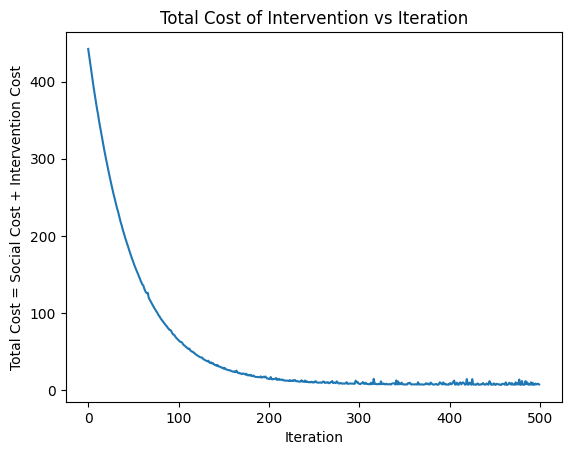

In [196]:
import numpy as np
from scipy.optimize import minimize
import scipy

f = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)
C = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = scipy.io.loadmat('traffic.mat')["traffic"]
l = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

# Inputs
m=1
a = np.random.uniform(0, 10, B.shape[1])

mu = 0.01
alpha = 0.5
u = np.random.uniform(0, 10, B.shape[1])

# functions
he = lambda u: u**2 # cost of intervention
dhe = lambda u: 2*u # derivative of he

Ce = lambda f, tau: f*tau # total delay in a link
dCe = lambda f, u, a: -a*(f**2)/(1+u) # derivative of C w.r.t ue

tau = lambda a, f, u: a*f/(1+u) # delay function

def integral_tau(f):
    s = 0
    for i in range(B.shape[0]):
        s += 0.5*a[i]*(f[i]**2)/(1+u[i])
    return s

def conservation_of_mass(f):
    return np.dot(B, f) - v

constraint = ({'type': 'eq', 'fun': lambda f: conservation_of_mass(f)})

v  = np.zeros(B.shape[0])
v[0] = 1
v[-1] = -1

v = m*v

T = []

for k in range(500):
    # Calculate Wardrop equilibrium for u
    result = minimize(integral_tau, x0=np.random.rand(B.shape[1]), constraints=constraint, method='trust-constr', bounds=[(0,None) for i in range(B.shape[1])])
    f_eq = result.x
    
    # Update u given f_eq
    dh = np.array([dhe(u[i]) for i in range(B.shape[1])])
    dC = np.array([dCe(f_eq[i],u[i],a[i]) for i in range(B.shape[1])])
    dT = dC + alpha*dh
    du = -mu*dT
    T.append(np.sum([f_eq[i]*tau(a[i], f_eq[i], u[i]) + alpha*he(u[i]) for i in range(B.shape[1])]))
    u = u + du
    
    if k%100==0:
        print(f'{k}/{500}')

import matplotlib.pyplot as plt

plt.title('Total Cost of Intervention vs Iteration')
plt.ylabel('Total Cost = Social Cost + Intervention Cost')
plt.xlabel('Iteration')
plt.plot(T)

In [197]:
u

array([0.3442053 , 0.1778935 , 0.08226263, 0.05260056, 0.10508178,
       0.56257269, 0.35021416, 0.10365366, 0.01557422, 0.01873562,
       0.05178534, 0.05573651, 0.0683539 , 0.00856347, 0.13835239,
       0.40482847, 0.19043508, 0.52772043, 0.22613774, 0.13491254,
       0.48946973, 0.26226275, 0.40130152, 0.26188023, 0.32006436,
       0.30679477, 0.94074967, 0.47139737])

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.
Initial u: [ 5.14879631  4.18051927 -0.38698795  0.06604674  6.66906505  7.16185256
  3.49051104  7.18357042  4.12025069  3.26062965  4.72069476  4.76344864
  9.94921047  0.85057777  1.30460292  3.37514166  9.63858654  0.23223826
  8.89111161  6.47686811  2.6116581   2.60947361  9.31739334  8.76424571
  3.54261591  3.68530466  2.20426562  5.82377952]
0/500
100/500
200/500
300/500
400/500
Final u: [0.42112182 0.34081765 0.02921058 0.00270507 0.44369174 0.10325819
 0.37589427 0.07147204 0.03085245 0.03552508 0.09505264 0.08341602
 0.07141324 0.00660262 0.02202627 0.25976573 0.21599404 0.28328287
 0.72330367 0.43173699 0.68007462 1.03068896 0.74191104 0.22731582
 0.05309104 0.6800316  0.49170613 0.30449839]
Total cost from 425.02 to 8.96


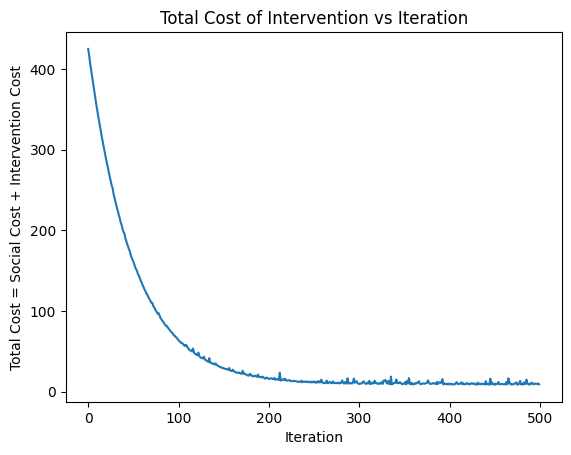

Initial u: [-0.54377547  7.8265869   9.37840958  9.42708176  4.10831386 -0.61061435
 -0.01118448 -0.34191266  6.99151273  0.19410657  4.29775017  8.62987556
  6.90734522  0.32988038 -0.09064639  1.67503937  3.40259557  0.03470335
 -0.18367007 -0.01182308  5.96051204  5.65881476  9.25416975  1.0052581
 -0.51849876  9.33624456  1.45220084  9.56607969]
0/500
100/500
200/500
300/500
400/500
Final u: [0.42297128 0.36658493 0.10530368 0.06602154 0.42437176 0.05798833
 0.37920661 0.02247234 0.05103227 0.01592739 0.08573832 0.10913374
 0.05532056 0.00440576 0.01607892 0.25558419 0.16703388 0.25666179
 0.70743479 0.44536596 0.67636664 1.04608523 0.73282325 0.20955058
 0.0314186  0.69256911 0.4827804  0.31325396]
Total cost from 401.57 to 10.98


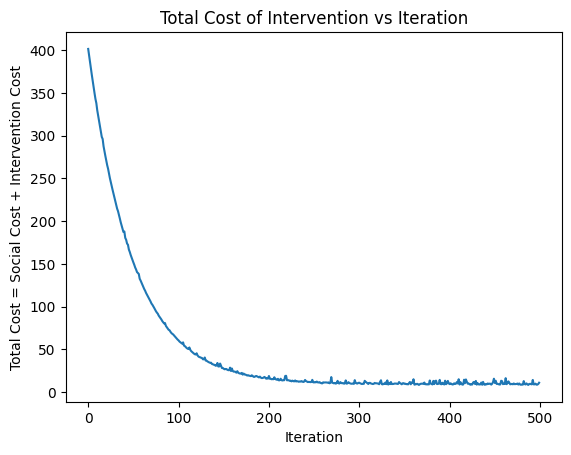

Initial u: [ 7.81351988 -0.52802317  4.15982902  7.23517264  4.15613985  5.84604193
  6.50837108  1.48819179  3.42653057  3.75051494  6.60327623  5.10664943
  4.80799202  5.71312278  9.98115719  4.49617415  0.76778283  4.52993304
  0.15564826  5.76613567  0.50228621  3.54174487  4.35743491  7.4088804
  3.20285865  1.59456491  8.27797426  3.91514725]
0/500
100/500
200/500
300/500
400/500
Final u: [0.43279608 0.32583572 0.06992017 0.05028464 0.43974843 0.09483555
 0.4356012  0.05834561 0.03964545 0.04148199 0.10013417 0.08484068
 0.0428497  0.03882628 0.07887252 0.2840432  0.12114623 0.24762274
 0.74444643 0.46207926 0.69557871 1.06161989 0.78071045 0.24424839
 0.05053376 0.72267142 0.47767958 0.28083026]
Total cost from 372.77 to 10.3


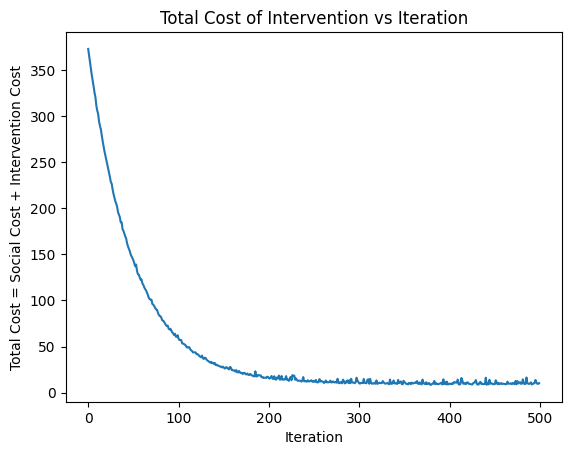

Initial u: [ 5.77339249  6.36520397  7.79389598  1.26810697  1.98271249  3.81219268
  7.69408433 -0.34600216  0.92653692  1.33302809  4.67409202  6.92991214
  7.030234    1.6846699   9.27007882  4.49768578  2.10007878  8.02199722
  8.88933582  8.13472748  3.61023188  3.95953192  2.04478499  9.72687158
  2.71673352 -0.59437531  4.43031687  7.4387631 ]
0/500
100/500
200/500
300/500
400/500
Final u: [0.4505695  0.36146892 0.09952308 0.01268766 0.41175324 0.07918858
 0.45029484 0.03906694 0.01755447 0.03720398 0.09577941 0.09331819
 0.05751307 0.01303592 0.07513112 0.26572522 0.12888474 0.25440792
 0.78196746 0.43903314 0.63993769 0.98642139 0.74774618 0.27035014
 0.04792207 0.70267364 0.49347216 0.30819878]
Total cost from 437.65 to 10.83


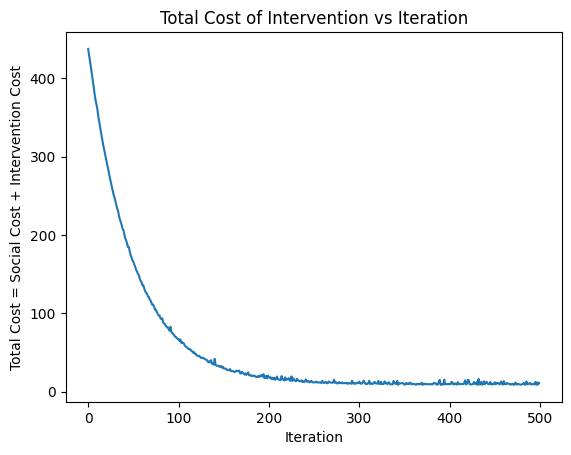

Initial u: [ 4.88085919  5.64164391  4.40500416  6.25804035  2.59391504  9.40354321
  0.49185403  1.01641809  0.06245074  5.11589938  3.68897421  3.7875493
  5.95148231  3.1080926   7.7970996   0.19127845  3.04449168  3.44397708
  4.20484151  3.64581588  7.77730506  3.40791319  1.01816066 -0.75978832
  2.09087254  6.19093286  6.22056533  6.01481284]
0/500
100/500
200/500
300/500
400/500
Final u: [0.47338382 0.3846922  0.06995275 0.04388141 0.40583701 0.11147567
 0.40389336 0.03465982 0.01136735 0.05231599 0.0934963  0.08253681
 0.04929091 0.02177851 0.06331092 0.2255037  0.15183156 0.24434279
 0.75041751 0.45607142 0.66948866 1.04666148 0.73959616 0.21611195
 0.04673779 0.69710226 0.49879621 0.30395194]
Total cost from 310.26 to 9.95


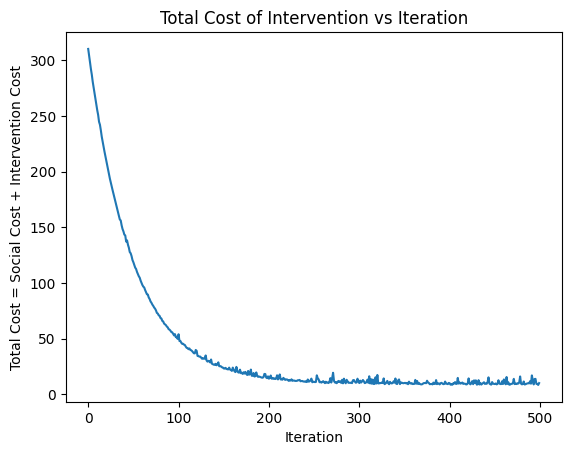

Initial u: [ 8.01502172  9.04198865  9.90394306  3.66489135  7.42993984  4.42725234
  3.13529692  3.45435151 -0.33534948  2.53879615  3.21791148  1.63995663
  5.33847455  9.03568738  3.93635996  0.69409354 -0.24703453  2.32274476
  7.88904813 -0.05487853  6.14683502  0.20894396  2.34851342  9.8558718
  4.32472808  7.37888573  7.49719711  0.40546416]
0/500
100/500
200/500
300/500
400/500
Final u: [0.47920713 0.38737371 0.10212573 0.02696501 0.41170291 0.08155479
 0.43107159 0.04687534 0.00150473 0.04072613 0.09532439 0.06829179
 0.04517133 0.06052987 0.03787181 0.21098944 0.12149268 0.21286684
 0.81977209 0.46082827 0.67971805 1.05731979 0.7134114  0.25719406
 0.06184409 0.67695782 0.4852115  0.27663632]
Total cost from 424.02 to 10.49


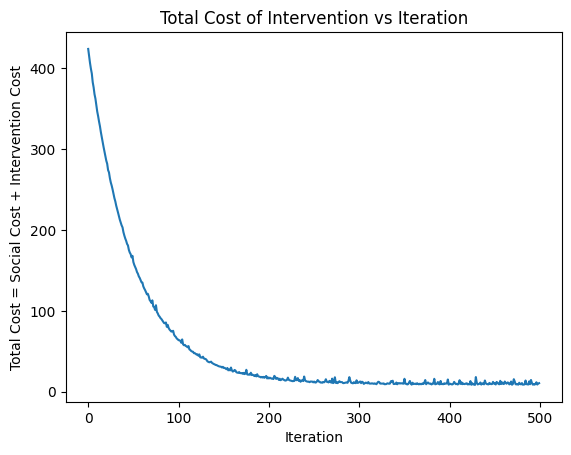

Initial u: [ 3.24940171  2.63036655  6.00474903  4.37809366  3.78818398  7.66027014
  4.22400312  6.19485704  0.35286083  1.84022514  5.49686091  3.43052361
  0.41272345  0.14360216  1.31985184 -0.37661684  1.61532241  5.62951383
  5.51061535  5.86589068  5.8013661   9.03203026  8.95958204  5.68819468
  8.92233975  5.02223659  9.04164433 -0.13089123]
0/500
100/500
200/500
300/500
400/500
Final u: [0.42291604 0.35000364 0.06734222 0.03126378 0.42889803 0.10533874
 0.43320362 0.06146233 0.00766113 0.02305521 0.10361198 0.07586046
 0.00997691 0.0022572  0.02140077 0.22427355 0.13718636 0.24607179
 0.80542479 0.42876942 0.68764605 1.03094667 0.75090754 0.25549238
 0.085759   0.69295085 0.51924652 0.29369695]
Total cost from 383.54 to 10.05


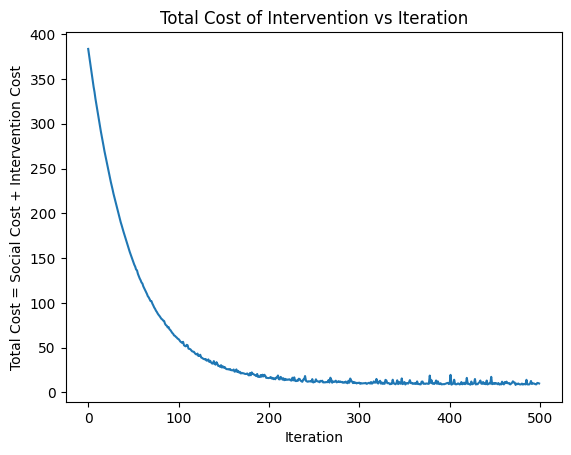

Initial u: [ 6.10998354  4.38130823  4.74562693  8.76294837  6.74350549  0.50666679
  2.99365641  8.16977979  6.40846219 -0.63339646  5.34178787  3.82611926
  9.52681361 -0.74006655  9.30923881  2.07142812  2.03285242 -0.50305531
  4.96381076  2.38653679  2.06819113  9.66889874  4.57271519  1.92882444
  1.49570656  1.46399612  8.55891476  4.03764528]
0/500
100/500
200/500
300/500
400/500
Final u: [ 0.44732821  0.36446243  0.06933254  0.06151605  0.42530415  0.06245752
  0.41115363  0.07523568  0.05696692  0.01572137  0.09668683  0.0833234
  0.07081615 -0.00265796  0.07371345  0.24845919  0.1397304   0.22981019
  0.75005005  0.44447093  0.63608114  1.02105752  0.74171092  0.23549722
  0.03923497  0.68727193  0.50882821  0.29958213]
Total cost from 400.41 to 11.61


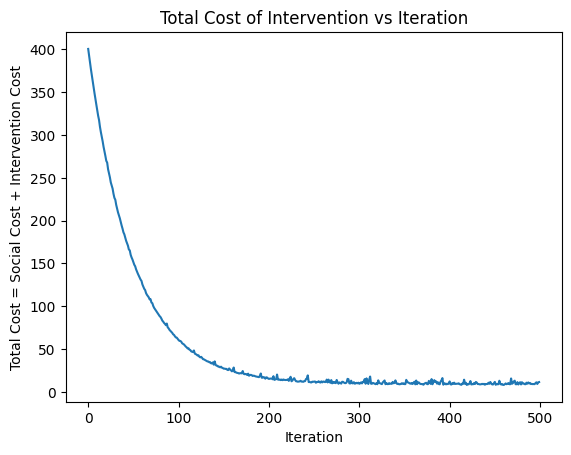

Initial u: [-0.44606551  5.83564044  5.2587857   8.16854808  5.80273003 -0.1135168
  3.90753198  4.70438741  8.41635694 -0.67802943  2.93352509 -0.24044679
  9.46923972  5.14738842  3.24787703  1.44491416  2.58957771  4.63299425
  8.11347447  8.52781866  4.99739416  6.12593822  7.59650921 -0.11160633
  9.74933955 -0.27207788  2.57237051  2.44887914]
0/500
100/500
200/500
300/500
400/500
Final u: [0.41304666 0.34472191 0.07118811 0.05755698 0.44776532 0.06352394
 0.4377389  0.06480305 0.06072464 0.01210168 0.09080874 0.05053159
 0.06995226 0.03568922 0.03776656 0.24214477 0.15498407 0.24824068
 0.80706236 0.4353385  0.71802443 1.03126134 0.74919544 0.21297498
 0.09065097 0.69062315 0.48678709 0.28971393]
Total cost from 407.1 to 9.51


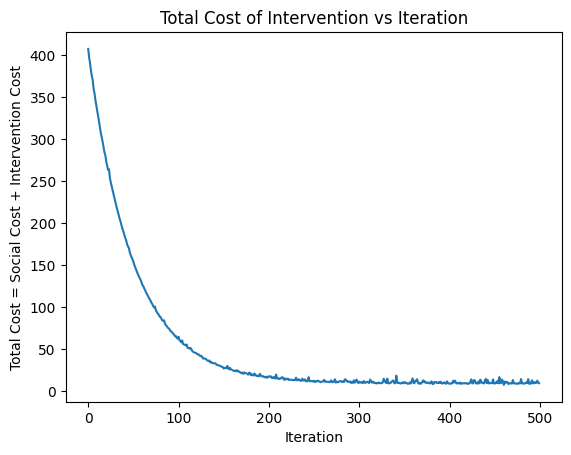

Initial u: [5.05877101e+00 9.58558294e-01 1.05156745e+00 6.16392510e+00
 1.08617335e+00 8.17484626e-03 1.88532353e+00 7.65629066e+00
 3.53059919e+00 8.93338455e+00 3.19298217e+00 8.71154046e+00
 7.24348909e+00 8.86656530e+00 3.43850726e+00 2.19110707e+00
 6.67584533e+00 9.92765604e+00 6.71620551e+00 1.23937828e+00
 4.46654974e+00 4.12397705e+00 3.13131134e+00 9.89700263e+00
 9.79985476e+00 9.47484836e+00 3.99380890e+00 9.34135564e+00]
0/500
100/500
200/500
300/500
400/500
Final u: [0.41425268 0.33191045 0.03374736 0.04342563 0.42862682 0.06090133
 0.34020536 0.06081605 0.02870061 0.06845524 0.06366961 0.11461408
 0.05140895 0.05953384 0.0379147  0.26515623 0.20908043 0.3181247
 0.63380004 0.42816656 0.62923758 1.00811426 0.71705642 0.22142159
 0.08862631 0.6847568  0.49218708 0.31552688]
Total cost from 541.51 to 9.7


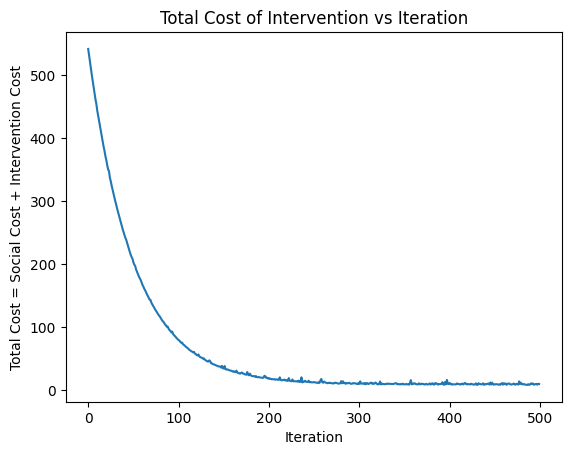

In [203]:
import numpy as np
from scipy.optimize import minimize
import scipy

f = scipy.io.loadmat('flow.mat')["flow"].reshape(28,)
C = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = scipy.io.loadmat('traffic.mat')["traffic"]
l = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

# Inputs
m=1
a = np.random.uniform(0, 10, B.shape[1])

mu = 0.01
alpha = 0.5

# functions
he = lambda u: u**2 # cost of intervention
dhe = lambda u: 2*u # derivative of he

Ce = lambda f, tau: f*tau # total delay in a link
dCe = lambda f, u, a: -a*(f**2)/(1+u) # derivative of C w.r.t ue

tau = lambda a, f, u: a*f/(1+u) # delay function

def integral_tau(f):
    s = 0
    for i in range(B.shape[0]):
        s += 0.5*a[i]*(f[i]**2)/(1+u[i])
    return s

def conservation_of_mass(f):
    return np.dot(B, f) - v

constraint = ({'type': 'eq', 'fun': lambda f: conservation_of_mass(f)})

v  = np.zeros(B.shape[0])
v[0] = 1
v[-1] = -1

v = m*v

n_iter = 500
for _ in range(10): 
    u = np.random.uniform(-1,10, B.shape[1])
    T = []
    print(f'Initial u: {u}')
    for k in range(n_iter):
        # Calculate Wardrop equilibrium for u
        result = minimize(integral_tau, x0=np.random.rand(B.shape[1]), constraints=constraint, method='trust-constr', bounds=[(0,None) for i in range(B.shape[1])])
        f_eq = result.x

        # Update u given f_eq
        dh = np.array([dhe(u[i]) for i in range(B.shape[1])])
        dC = np.array([dCe(f_eq[i],u[i],a[i]) for i in range(B.shape[1])])
        dT = dC + alpha*dh
        du = -mu*dT
        T.append(np.sum([f_eq[i]*tau(a[i], f_eq[i], u[i]) + alpha*he(u[i]) for i in range(B.shape[1])]))
        u = u + du

        if k%100==0:
            print(f'{k}/{n_iter}')

    import matplotlib.pyplot as plt
    print(f'Final u: {u}')
    print(f'Total cost from {round(T[0],2)} to {round(T[-1],2)}')
    plt.title('Total Cost of Intervention vs Iteration')
    plt.ylabel('Total Cost = Social Cost + Intervention Cost')
    plt.xlabel('Iteration')
    plt.plot(T)
    plt.show()